## Import Packages

In [1]:
import numpy as np
import pandas as pd


## Reduce memory usage

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        col_type2 = df[col].dtype.name
        
        if ((col_type != object) and (col_type2 != 'category')):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

## Load Data

In [3]:
orders = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/orders.csv'))
order_products_prior = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/order_products__prior.csv'))
order_products_train = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/order_products__train.csv'))
products = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/products.csv'))
departments = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/departments.csv'))
aisles = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/aisles.csv'))

Memory usage of dataframe is 182.71 MB
Memory usage after optimization is: 45.68 MB
Decreased by 75.0%
Memory usage of dataframe is 989.82 MB
Memory usage after optimization is: 340.25 MB
Decreased by 65.6%
Memory usage of dataframe is 42.26 MB
Memory usage after optimization is: 13.20 MB
Decreased by 68.7%
Memory usage of dataframe is 1.52 MB
Memory usage after optimization is: 1.91 MB
Decreased by -25.8%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by -92.7%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.01 MB
Decreased by -159.9%


In [4]:
print(orders.shape)
print(order_products_prior.shape)
print(order_products_train.shape)
print(products.shape)
print(departments.shape)
print(aisles.shape)

(3421083, 7)
(32434489, 4)
(1384617, 4)
(49688, 4)
(21, 2)
(134, 2)


### Number of unique products in each department

In [5]:
products.department_id.value_counts().sort_values(ascending=True)

10      38
2      548
12     907
8      972
5     1054
18    1081
14    1115
6     1139
21    1258
20    1322
3     1516
4     1684
9     1858
15    2092
17    3085
16    3449
1     4007
7     4365
13    5371
19    6264
11    6563
Name: department_id, dtype: int64

In [6]:
prior_df = orders[orders.eval_set == 'prior']

### Joining order table with product table

In [7]:
temp = reduce_mem_usage(pd.merge(left=prior_df, right=order_products_prior, on='order_id'))
temp.head()

Memory usage of dataframe is 897.03 MB
Memory usage after optimization is: 897.03 MB
Decreased by 0.0%


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


### Visualize hour of day that orders are placed

<AxesSubplot:xlabel='order_hour_of_day', ylabel='Count'>

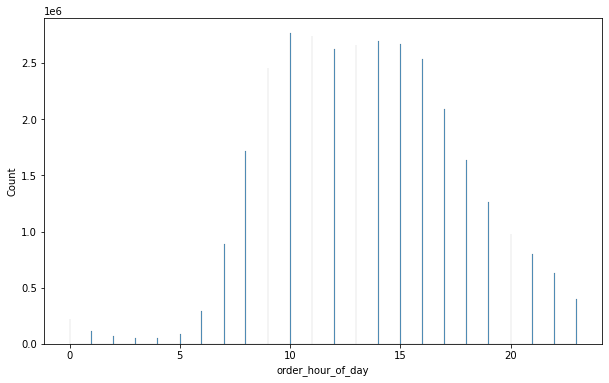

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.histplot(x='order_hour_of_day',data=temp)

### Joining product table with aisles table and temp2 with department table

In [9]:
temp2 = reduce_mem_usage(pd.merge(left=products, right=aisles, on='aisle_id'))
temp3 = reduce_mem_usage(pd.merge(left=temp2, right=departments, on='department_id'))
temp3

Memory usage of dataframe is 2.39 MB
Memory usage after optimization is: 2.39 MB
Decreased by 0.0%
Memory usage of dataframe is 2.44 MB
Memory usage after optimization is: 2.44 MB
Decreased by 0.0%


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks
...,...,...,...,...,...,...
49683,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk
49684,28655,Crystallized Ginger Chunks,18,10,bulk dried fruits vegetables,bulk
49685,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk dried fruits vegetables,bulk


In [10]:
final_prior_df = reduce_mem_usage(pd.merge(left=temp, right=temp3, on='product_id'))

Memory usage of dataframe is 1207.74 MB
Memory usage after optimization is: 1207.74 MB
Decreased by 0.0%


In [11]:
final_prior_df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'aisle', 'department'],
      dtype='object')

In [12]:
final_prior_df.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,soft drinks,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,soft drinks,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,soft drinks,beverages
5,3367565,1,prior,6,2,7,19.0,196,1,1,Soda,77,7,soft drinks,beverages
6,550135,1,prior,7,1,9,20.0,196,1,1,Soda,77,7,soft drinks,beverages
7,3108588,1,prior,8,1,14,14.0,196,2,1,Soda,77,7,soft drinks,beverages
8,2295261,1,prior,9,1,16,0.0,196,4,1,Soda,77,7,soft drinks,beverages
9,2550362,1,prior,10,4,8,30.0,196,1,1,Soda,77,7,soft drinks,beverages


### Visualize day of week that orders are placed

<AxesSubplot:>

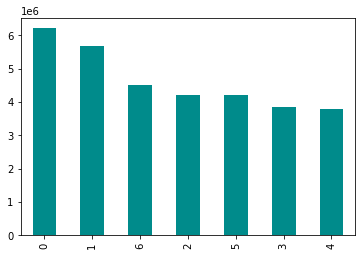

In [13]:
final_prior_df['order_dow'].value_counts().sort_values(ascending = False).plot(kind='bar',color='darkcyan')

### Visualize hour of day that orders are placed sorted ascending

<AxesSubplot:>

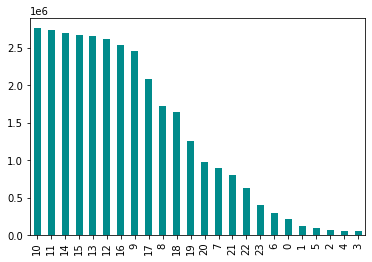

In [14]:
final_prior_df['order_hour_of_day'].value_counts().sort_values(ascending = False).plot(kind='bar',color='darkcyan')

In [15]:
final_prior_df['reordered'].value_counts().sort_values(ascending = False)

1    19126536
0    13307953
Name: reordered, dtype: int64

In [16]:
final_prior_df['order_number'].value_counts().sort_values(ascending = False)

1     2078068
3     2050731
2     2048332
4     1820298
5     1628411
       ...   
95      14528
96      13746
97      13367
98      12858
99      12436
Name: order_number, Length: 99, dtype: int64

### Descriptive Statistics

In [17]:
final_prior_df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,30356421.0,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,NaN,2.557634e+04,8.351076e+00,5.896975e-01,7.121430e+01,9.921906e+00
std,9.873007e+05,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,0.0,1.409669e+04,7.126671e+00,4.918886e-01,3.820302e+01,6.281156e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.559430e+05,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.0,1.353000e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00
50%,1.711048e+06,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.0,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00
75%,2.565514e+06,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,15.0,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01


### Number of products in each department

In [18]:
final_prior_df['department'].value_counts().sort_values(ascending=True)

bulk                 34573
other                36291
missing              69145
pets                 97724
alcohol             153696
international       269253
babies              423802
personal care       447123
meat seafood        708931
breakfast           709569
household           738666
dry goods pasta     866627
deli               1051249
canned goods       1068058
bakery             1176787
pantry             1875577
frozen             2236432
beverages          2690129
snacks             2887550
dairy eggs         5414016
produce            9479291
Name: department, dtype: int64

### Extract data only from the five most ordered categories: 1) produce 2) dairy eggs 3) snacks 4) beverages and 5) frozen

In [19]:
final_prior_df_produce = final_prior_df[final_prior_df.department == 'produce']
rows = np.random.choice(final_prior_df_produce.index.values, 9479291)
sampled_produce = final_prior_df_produce.loc[rows]
sampled_produce.shape

(9479291, 15)

In [20]:
final_prior_df_dairyeggs = final_prior_df[final_prior_df.department == 'dairy eggs']
rows = np.random.choice(final_prior_df_dairyeggs.index.values, 5414016)
sampled_dairyeggs = final_prior_df_dairyeggs.loc[rows]
sampled_dairyeggs.shape

(5414016, 15)

In [21]:
final_prior_df_snacks = final_prior_df[final_prior_df.department == 'snacks']
rows = np.random.choice(final_prior_df_snacks.index.values, 2887550)
sampled_snacks = final_prior_df_snacks.loc[rows]
sampled_snacks.shape

(2887550, 15)

In [22]:
final_prior_df_beverages = final_prior_df[final_prior_df.department == 'beverages']
rows = np.random.choice(final_prior_df_beverages.index.values, 2690129)
sampled_beverages = final_prior_df_beverages.loc[rows]
sampled_beverages.shape

(2690129, 15)

In [23]:
final_prior_df_frozen = final_prior_df[final_prior_df.department == 'frozen']
rows = np.random.choice(final_prior_df_frozen.index.values, 2236432)
sampled_frozen = final_prior_df_frozen.loc[rows]
sampled_frozen.shape

(2236432, 15)

In [24]:
print(sampled_produce.shape)
print(sampled_dairyeggs.shape)
print(sampled_snacks.shape)
print(sampled_beverages.shape)
print(sampled_frozen.shape)

(9479291, 15)
(5414016, 15)
(2887550, 15)
(2690129, 15)
(2236432, 15)


In [25]:
# append all product, dairy egg, snacks, beverages, and frozen together
frame = [sampled_produce,sampled_dairyeggs,sampled_snacks,sampled_beverages,sampled_frozen]
myDataFrame = reduce_mem_usage(pd.DataFrame())
for df in frame:
    myDataFrame = myDataFrame.append(df)
#final_prior_df_appended = final_prior_df_produce.append(final_prior_df_dairyeggs,final_prior_df_snacks,final_prior_df_beverages,final_prior_df_frozen,final_prior_df_pantry,final_prior_df_bakery,final_prior_df_cannedgoods,final_prior_df_deli,final_prior_df_meatseafood)

/var/folders/pv/3tp757f9271btvqh0thcbp4w0000gn/T/ipykernel_20214/1144455515.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  start_mem = df.memory_usage().sum() / 1024**2
/var/folders/pv/3tp757f9271btvqh0thcbp4w0000gn/T/ipykernel_20214/1144455515.py:34: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  end_mem = df.memory_usage().sum() / 1024**2
/var/folders/pv/3tp757f9271btvqh0thcbp4w0000gn/T/ipykernel_20214/1144455515.py:36: RuntimeWarning: invalid value encountered in double_scalars
  print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
/var/folders/pv/3tp757f9271btvqh0thcbp4w0000gn/T/ipykernel_20214/2056993344.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by nan%


/var/folders/pv/3tp757f9271btvqh0thcbp4w0000gn/T/ipykernel_20214/2056993344.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myDataFrame = myDataFrame.append(df)
/var/folders/pv/3tp757f9271btvqh0thcbp4w0000gn/T/ipykernel_20214/2056993344.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myDataFrame = myDataFrame.append(df)
/var/folders/pv/3tp757f9271btvqh0thcbp4w0000gn/T/ipykernel_20214/2056993344.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myDataFrame = myDataFrame.append(df)
/var/folders/pv/3tp757f9271btvqh0thcbp4w0000gn/T/ipykernel_20214/2056993344.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myDataFrame = myDataF

In [26]:
myDataFrame.shape

(22707418, 15)

In [27]:
myDataFrame['department'].value_counts().sort_values(ascending=True)

babies                   0
pets                     0
personal care            0
pantry                   0
other                    0
missing                  0
meat seafood             0
international            0
household                0
bakery                   0
alcohol                  0
deli                     0
breakfast                0
canned goods             0
bulk                     0
dry goods pasta          0
frozen             2236432
beverages          2690129
snacks             2887550
dairy eggs         5414016
produce            9479291
Name: department, dtype: int64

In [28]:
myDataFrame.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
4958913,492487,15953,prior,1,4,18,NaN,8424,8,0,Broccoli Crown,83,4,fresh vegetables,produce
7814404,2374700,85397,prior,2,3,6,10.0,28842,7,1,Bunched Cilantro,16,4,fresh herbs,produce
1531221,2857852,1563,prior,98,4,20,1.0,24852,1,1,Banana,24,4,fresh fruits,produce
9683900,2740802,197081,prior,7,0,17,3.0,46667,1,1,Organic Ginger Root,83,4,fresh vegetables,produce
8605391,209090,122525,prior,3,4,19,30.0,5876,8,0,Organic Lemon,24,4,fresh fruits,produce


### Visualize day of week that these five categories are mostly ordered

<AxesSubplot:>

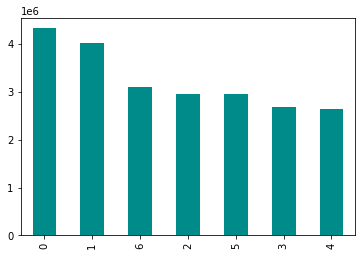

In [29]:
myDataFrame['order_dow'].value_counts().sort_values(ascending = False).plot(kind='bar',color='darkcyan')

### Visualize hour of day that these five caegories are mostly ordered

<AxesSubplot:>

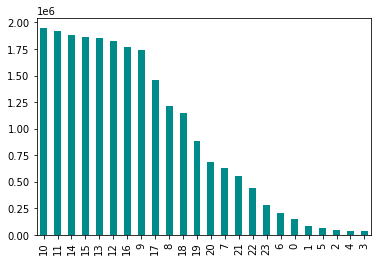

In [30]:
myDataFrame['order_hour_of_day'].value_counts().sort_values(ascending = False).plot(kind='bar',color='darkcyan')

### Visualize whether this product has been ordered by this customer before

<AxesSubplot:>

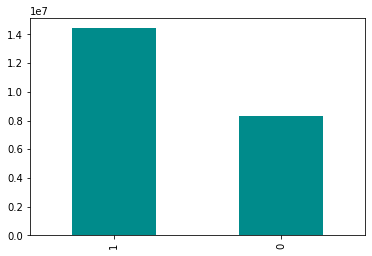

In [31]:
myDataFrame['reordered'].value_counts().sort_values(ascending = False).plot(kind='bar',color='darkcyan')

In [32]:
myDataFrame['reordered'].value_counts()

1    14418537
0     8288881
Name: reordered, dtype: int64

In [33]:
reorder_num = 14419067
total_order_count = 22707418

print("ordered before: ", 14419067/22707418)

reorder_0_num = 8288351
total_order_count = 22707418

print("never ordered before: ", 8288351/22707418)

ordered before:  0.6349936835619091
never ordered before:  0.36500631643809084


In [34]:
myDataFrame['order_number'].value_counts()

1     1425872
3     1409311
2     1407832
4     1254043
5     1124047
       ...   
95      10586
96       9886
97       9810
98       9547
99       8931
Name: order_number, Length: 99, dtype: int64

In [35]:
myDataFrame['reordered'].value_counts()

1    14418537
0     8288881
Name: reordered, dtype: int64

### To see the average of number of days prior order

In [36]:
only_days_since = myDataFrame.days_since_prior_order

In [37]:
only_days_since_filled = only_days_since.fillna(0)

In [38]:
import statistics
print(statistics.mean(only_days_since_filled))

10.318002381424431


In [39]:
myDataFrame.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
count,2.270742e+07,2.270742e+07,2.270742e+07,2.270742e+07,2.270742e+07,21281546.0,2.270742e+07,2.270742e+07,2.270742e+07,2.270742e+07,2.270742e+07
mean,1.710670e+06,1.029702e+05,1.738874e+01,2.730861e+00,1.341521e+01,NaN,2.596598e+04,8.015661e+00,6.349703e-01,7.034264e+01,8.828490e+00
std,9.873018e+05,5.947893e+04,1.768313e+01,2.086234e+00,4.252488e+00,0.0,1.400770e+04,6.899042e+00,4.814385e-01,3.840011e+01,6.448508e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
25%,8.558230e+05,5.141400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.0,1.408400e+04,3.000000e+00,0.000000e+00,2.400000e+01,4.000000e+00
50%,1.710796e+06,1.026560e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.0,2.558800e+04,6.000000e+00,1.000000e+00,8.300000e+01,4.000000e+00
75%,2.565662e+06,1.544170e+05,2.400000e+01,5.000000e+00,1.600000e+01,15.0,3.838700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968500e+04,1.450000e+02,1.000000e+00,1.290000e+02,1.900000e+01


In [40]:
myDataFrame['aisle_id'].value_counts()

24     3640713
83     3419156
123    1766440
120    1453918
21      979693
84      892275
115     841538
107     723028
91      636918
31      577018
116     521527
37      498416
78      459396
3       455524
86      451342
38      391369
16      377725
77      357635
98      333210
53      317917
108     307832
117     306353
45      300539
32      275257
36      254508
94      248064
61      233331
52      233177
26      207672
129     194548
50      175768
23      163819
79      161930
64      103592
42       98995
2        81873
34       72096
58       40046
71       37740
125      35723
46       22969
90       21400
119      19361
103      11100
113       4967
Name: aisle_id, dtype: int64